In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv('/Users/abhishekjaiswal/Downloads/Zomatodataset/zomato.csv', encoding='latin-1')
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [11]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Data Analysis -

1. Find Missing Values
2. Explore Numerical Varibales
3. Explore Categorical Variables
4. Finding Relationships between Features

In [12]:
# Find Missing Values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [13]:
# OR the other way to do it- 
# Check which all variables have Missing Values
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

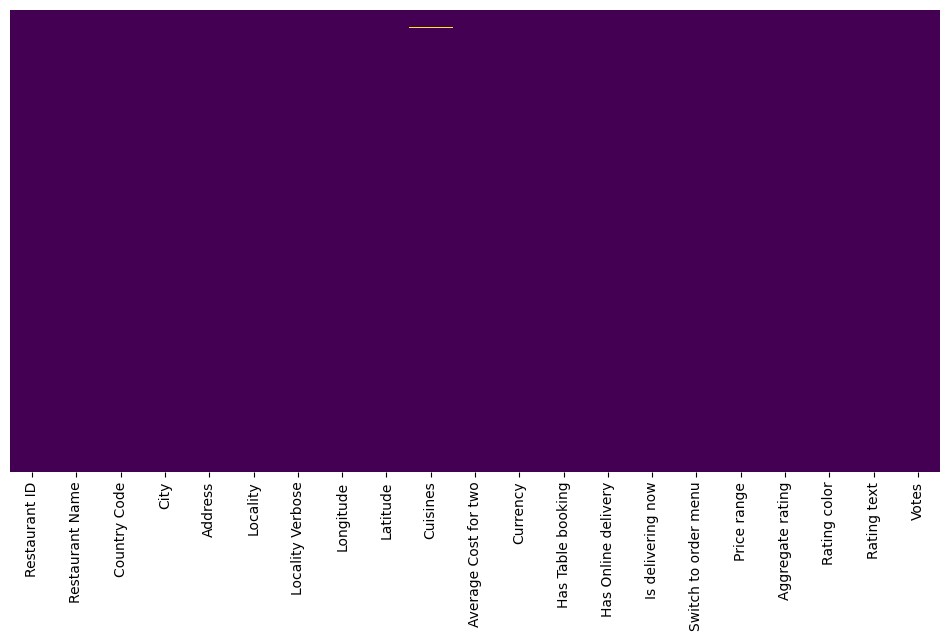

In [62]:
# OR Using HeatMap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [17]:
df_country = pd.read_excel('/Users/abhishekjaiswal/Downloads/Zomatodataset/Country-Code.xlsx')
df_country.head(5)

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [18]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [22]:
# Merge both Datasets
final_df = pd.merge(df, df_country, on='Country Code', how='left')

In [26]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [28]:
# Check DataType
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [29]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [30]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [39]:
country_names = final_df.Country.value_counts().index
country_values = final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7f956bdaa370>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.030157837943120734, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.016449729787156763, '0.87%')])

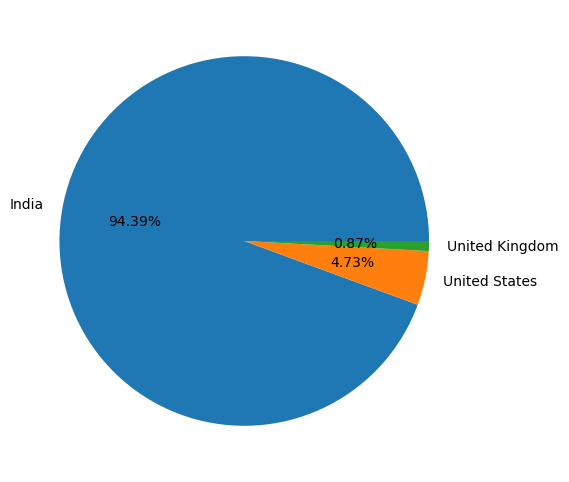

In [63]:
# Pie Chart
plt.pie(country_values[:3], labels = country_names[:3], autopct = '%1.2f%%')

In [53]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0: 'Rating count'})

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Observations -

When Rating is between-
1. 4.9 to 4.5 - Excellent
2. 4.4 to 4.0 - Very Good
3. 3.9 to 3.5 - Good
4. 3.4 to 2.5 - Average
5. 2.4 to 1.8 - Poor
6. 0.0 - Not Rated

In [54]:
ratings.head(5)

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

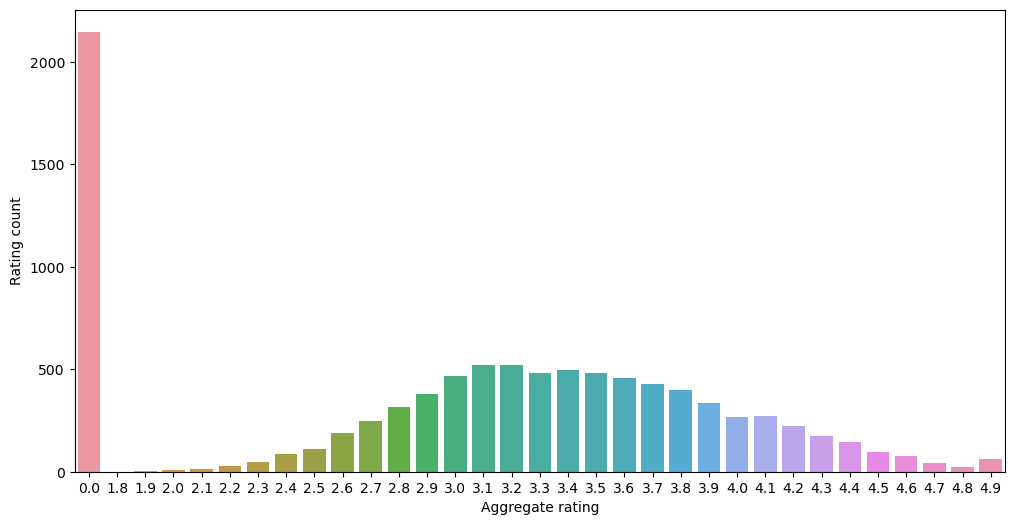

In [61]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = 'Aggregate rating', y = 'Rating count', data = ratings)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating count'>

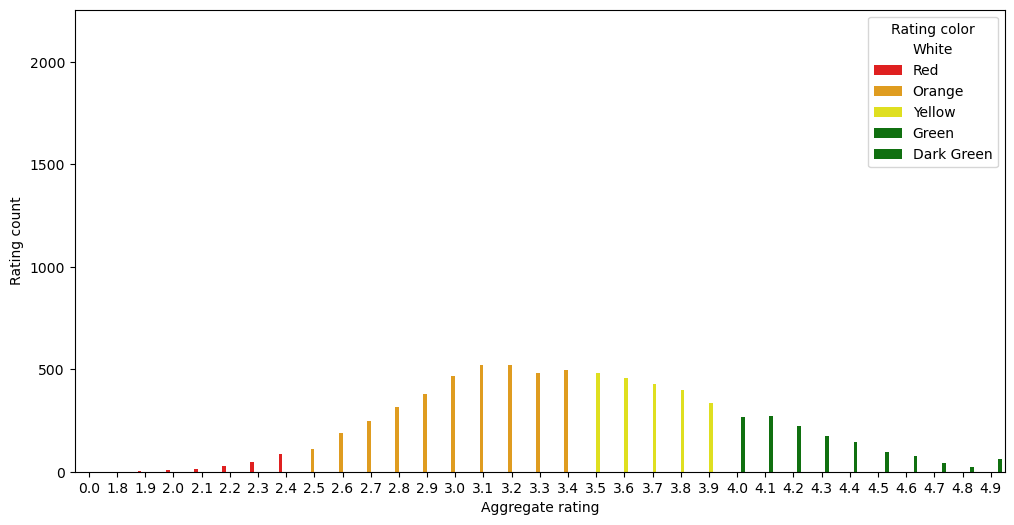

In [79]:
sns.barplot(x = 'Aggregate rating', y = 'Rating count', hue = 'Rating color', data = ratings, palette = ['White', 'Red', 'Orange', 'Yellow', 'Green', 'Green'])

## Observations -

1. Not Rated count is very high.
2. Max number of Rating is between 3.0 to 3.7

<AxesSubplot:xlabel='Rating color', ylabel='count'>

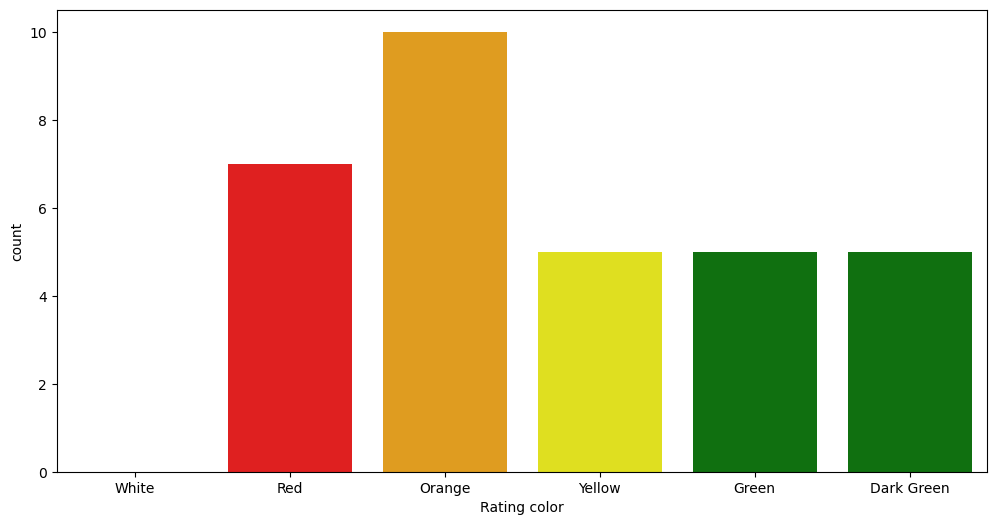

In [80]:
# Count Plot
sns.countplot(x = 'Rating color', data = ratings, palette = ['White', 'Red', 'Orange', 'Yellow', 'Green', 'Green'])

In [86]:
# Countries with '0' Ratings
final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index()
# OR
# final_df.groupby(['Aggregate rating', 'Country']).size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


## Observations -

- Max number of '0' Ratings are from- India

In [91]:
# Country & their Currency
final_df.groupby(['Country', 'Currency']).size().reset_index().head(5)

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21


In [94]:
# Countries with Online Deliveries Option
final_df[final_df['Has Online delivery'] == 'Yes'].groupby('Country').size().reset_index()

,Country,0
0,India,2423
1,UAE,28


## Observations -

- Online delivery is only available in the India & UAE.

In [97]:
# Pie Chart for Cities distribution
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

([<matplotlib.patches.Wedge at 0x7f959b9a0340>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029922, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289048, '0.31%')])

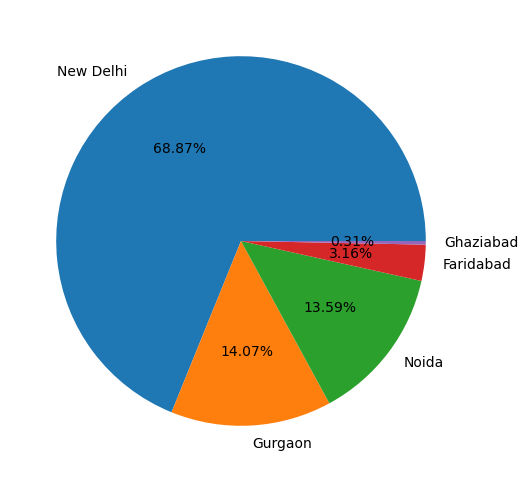

In [102]:
city_values = final_df.City.value_counts().values
city_labels = final_df.City.value_counts().index
plt.pie(city_values[:5], labels = city_labels[:5], autopct = '%1.2f%%')